# Data Cleaning and EDA for project 2 Web APIs and NLP

The project report is available [here](https://git.generalassemb.ly/sumakarnam/dsir-82/blob/master/projects/project3/Code/Project%203%20%20-%20Final%20Report.ipynb). 

Using [Pushshift's](https://github.com/pushshift/api) API, 2000+ posts were scraped from the following subreddits:

- [r/languagelearning](https://www.reddit.com/r/languagelearning/)
- [r/linguistics](https://www.reddit.com/r/linguistics/)

The code for scraping data is available in this [notebook](https://git.generalassemb.ly/sumakarnam/dsir-82/blob/master/projects/project3/Code/Scraping%20Reddit%20data.ipynb)


In this notebook, the scraped reddit data is cleaned by discarding any posts that were removed or had no content except for the title. This data is exported to a [.csv file](https://git.generalassemb.ly/sumakarnam/dsir-82/blob/master/projects/project3/Data/reddit_data_clean.csv). 

This notebook also includes an EDA of the numerical features of the scraped data (character and word counts of the title and text of the post and number of comments). As the distributions of these numerical features were similar for both the subreddits, only the text data is used to classify the posts. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# seaborn plot styles

sns.set_style("dark")
sns.set_palette("deep")
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
myblue = '#0b5394'

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

#display all output form a cell not just the last (the options are 'all', 'none', 'last' and 'last_expr'.)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#import reddit data

ll = pd.read_csv('./languagelearning2.csv') 
lg = pd.read_csv('./linguistics2.csv')


In [4]:
#creating a single dataframe with all the data

data = pd.concat([ll, lg], ignore_index=True)

for x in ['languagelearning','linguistics']:
    data[data['subreddit'] == x]['created_utc'].min()

#dropping posts with no self text

data.dropna(subset = ['selftext'], inplace=True)

#dropping posts that were removed

data = data[~data['selftext'].str.contains('\[removed\]')].reset_index(drop = True)

data.shape
data.groupby('subreddit').count()

1615476640

1587755221

(9271, 6)

,title,selftext,created_utc,author,num_comments
subreddit,,,,,
languagelearning,4258,4258,4258,4258,4258
linguistics,5013,5013,5013,5013,5013


In [5]:
#adding word count and char count of the tile and selftext to the DataFrame

data['post_word_count'] = data['selftext'].apply(lambda x : len(x.split()))
data['post_char_count'] = data['selftext'].apply(len)
data['title_char_count'] = data['title'].apply(len)
data['title_word_count'] = data['title'].apply(lambda x : len(x.split()))

In [6]:
#saving the DataFrame as .csv

data.to_csv('./reddit_data_clean_2.csv', index=False)

In [7]:
data.groupby('subreddit').describe().T

subreddit               languagelearning   linguistics
created_utc      count      4.258000e+03  5.013000e+03
                 mean       1.621006e+09  1.602931e+09
                 std        2.765468e+06  8.651773e+06
                 min        1.615477e+09  1.587755e+09
                 25%        1.618878e+09  1.595599e+09
                 50%        1.621074e+09  1.603482e+09
                 75%        1.623404e+09  1.609832e+09
                 max        1.625532e+09  1.618934e+09
num_comments     count      4.258000e+03  5.013000e+03
                 mean       1.267097e+01  1.372172e+01
                 std        2.936888e+01  3.207600e+01
                 min        0.000000e+00  0.000000e+00
                 25%        3.000000e+00  1.000000e+00
                 50%        6.000000e+00  4.000000e+00
                 75%        1.200000e+01  1.100000e+01
                 max        5.510000e+02  3.950000e+02
post_word_count  count      4.258000e+03  5.013000e+03
                 mean       1.127729e+02  1.000313e+02
                 std        1.482324e+02  1.275628e+02
                 min        1.000000e+00  1.000000e+00
                 25%        4.100000e+01  3.700000e+01
                 50%        7.400000e+01  7.100000e+01
                 75%        1.340000e+02  1.210000e+02
                 max        2.555000e+03  3.985000e+03
post_char_count  count      4.258000e+03  5.013000e+03
                 mean       6.451538e+02  6.069156e+02
                 std        8.764527e+02  7.925443e+02
                 min        1.000000e+00  4.000000e+00
                 25%        2.310000e+02  2.220000e+02
                 50%        4.170000e+02  4.230000e+02
                 75%        7.530000e+02  7.230000e+02
                 max        1.477600e+04  2.483700e+04
title_char_count count      4.258000e+03  5.013000e+03
                 mean       5.402231e+01  6.200479e+01
                 std        3.497770e+01  4.045135e+01
                 min        2.000000e+00  1.000000e+00
                 25%        3.100000e+01  3.500000e+01
                 50%        4.600000e+01  5.300000e+01
                 75%        6.700000e+01  7.900000e+01
                 max        2.970000e+02  2.990000e+02
title_word_count count      4.258000e+03  5.013000e+03
                 mean       9.180132e+00  9.931578e+00
                 std        6.413971e+00  6.866117e+00
                 min        1.000000e+00  1.000000e+00
                 25%        5.000000e+00  5.000000e+00
                 50%        8.000000e+00  8.000000e+00
                 75%        1.200000e+01  1.300000e+01
                 max        5.700000e+01  5.600000e+01

### Visualizations of the content of the two subreddits

In [8]:
data.columns

Index(['subreddit', 'title', 'selftext', 'created_utc', 'author',
       'num_comments', 'post_word_count', 'post_char_count',
       'title_char_count', 'title_word_count'],
      dtype='object')

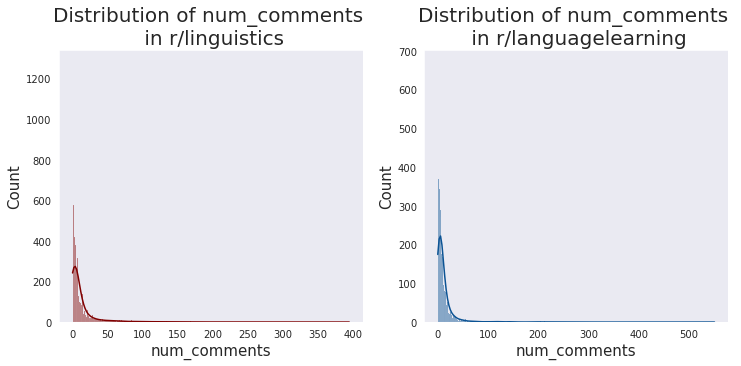

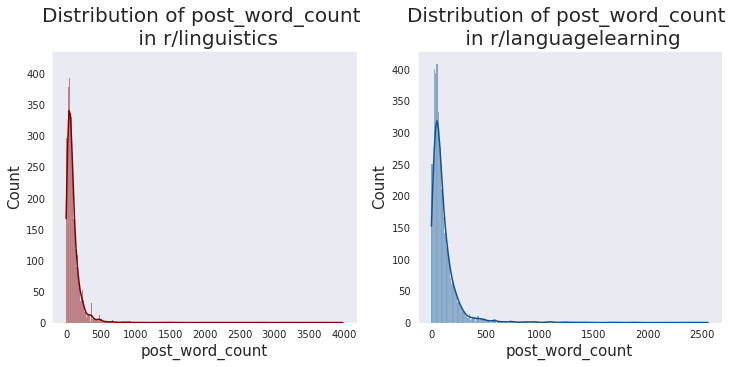

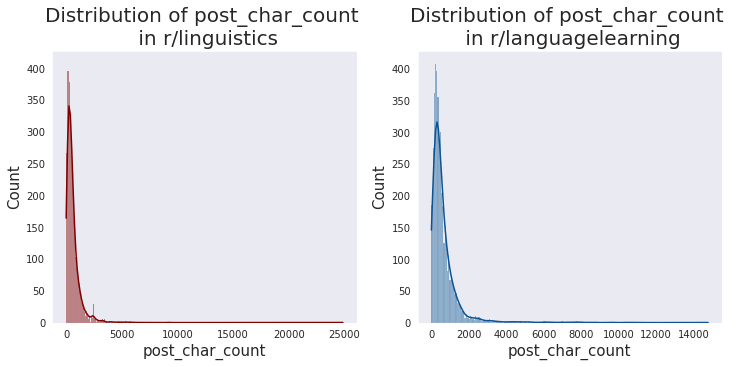

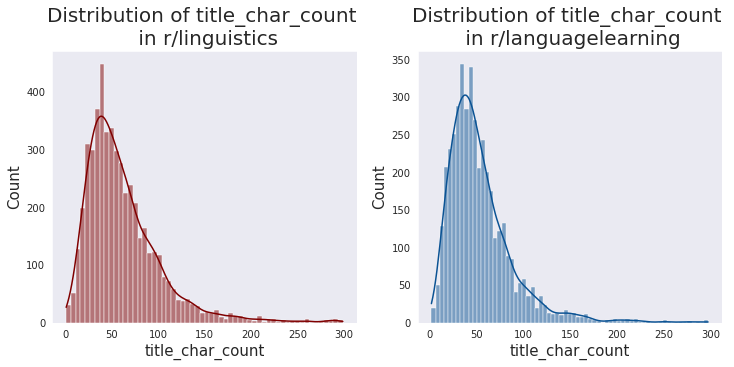

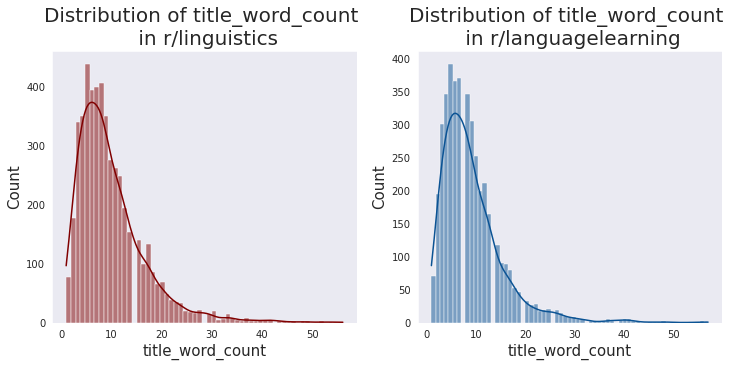

In [9]:
# distributions of the numerical features of the two subreddits

def plot_hists(col, data):
    
    fig, ax = plt.subplots(1,2,figsize = (12,5))
    sns.histplot(x = data[data['subreddit'] == 'linguistics'][col], color = '#800000', kde = True, ax = ax[0])
    ax[0].set_title(f'Distribution of {col} \n in r/linguistics');
    sns.histplot(x = data[data['subreddit'] == 'languagelearning'][col], color = myblue, kde = True, ax = ax[1])
    ax[1].set_title(f'Distribution of {col} \n in r/languagelearning');

for col in ['num_comments', 'post_word_count', 'post_char_count', 'title_char_count', 'title_word_count']:
    plot_hists(col,data)



In [10]:
cv = CountVectorizer(stop_words='english', ngram_range=(1,2))

#vectorizing text column and making a DataFrame with the vectors
title_vect = cv.fit_transform(data['title'])
title_vect_df = pd.DataFrame(title_vect.todense(), columns=cv.get_feature_names())

#vectorizing selftext column and making a DataFrame with the vectors
selftext_vect = cv.fit_transform(data['selftext'])
selftext_vect_df = pd.DataFrame(selftext_vect.todense(), columns=cv.get_feature_names())

for x in ['languagelearning', 'linguistics']:
    title_vect_df[data['subreddit'] == x].sum().sort_values(ascending=False).head(10)
    selftext_vect_df[data['subreddit'] == x].sum().sort_values(ascending=False).head(10)


language             1199
learning              741
learn                 589
english               353
languages             330
spanish               294
french                241
help                  200
native                181
language learning     169
dtype: int64

language     4840
learning     2954
like         2481
learn        2377
english      2338
know         2016
just         1995
spanish      1800
ve           1783
languages    1660
dtype: int64

language       754
languages      612
english        538
linguistics    274
does           246
word           233
help           219
words          207
question       191
like           150
dtype: int64

language       3116
like           2406
languages      2262
english        2179
know           1735
https          1498
just           1431
words          1358
linguistics    1347
word           1307
dtype: int64

In [11]:
#oldest posts in the data
for x in ['languagelearning','linguistics']:
    data[data['subreddit'] == x]['created_utc'].min()

1615476640

1587755221